In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
train = pd.read_csv("/kaggle/input/academy2025/train.csv")
test = pd.read_csv("/kaggle/input/academy2025/testFeatures.csv")

# Boyut bilgisi
print("Train veri seti boyutu:", train.shape)
print("Test veri seti boyutu:", test.shape)


Train veri seti boyutu: (227520, 8)
Test veri seti boyutu: (45504, 8)


In [3]:
print("\nEksik değerler (train):\n", train.isnull().sum())
print("\nEksik değerler (test):\n", test.isnull().sum())



Eksik değerler (train):
 tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

Eksik değerler (test):
 id                   0
tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64


In [4]:
train.rename(columns={'tarih': 'date'}, inplace=True)
test.rename(columns={'tarih': 'date'}, inplace=True)

# 'date' sütununu datetime formatına çevirme
train["date"] = pd.to_datetime(train["date"], errors='coerce')
test["date"] = pd.to_datetime(test["date"], errors='coerce')


In [5]:
for df in [train, test]:
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["week"] = df["date"].dt.isocalendar().week
    df["season"] = df["month"].apply(lambda x: (x % 12 + 3) // 3)


In [6]:
train.drop("date", axis=1, inplace=True)
test.drop("date", axis=1, inplace=True)


In [7]:
train_clean = train[(np.abs(stats.zscore(train['ürün fiyatı'])) < 3)]
train_clean = train_clean[(np.abs(stats.zscore(train_clean['ürün besin değeri'])) < 3)]


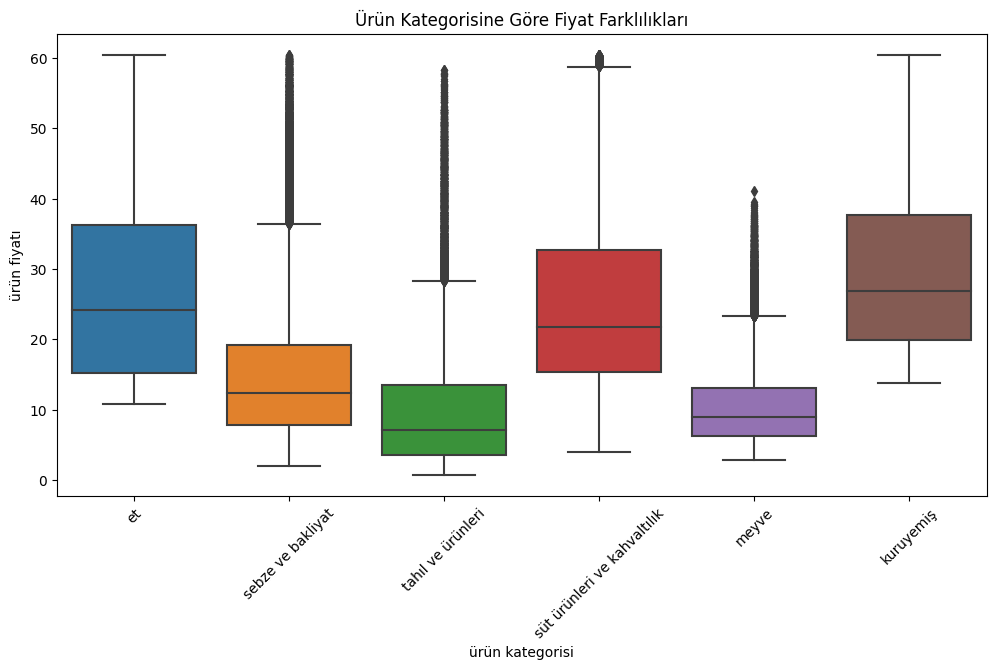

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ürün kategorisi', y='ürün fiyatı', data=train_clean)
plt.title('Ürün Kategorisine Göre Fiyat Farklılıkları')
plt.xticks(rotation=45)
plt.show()


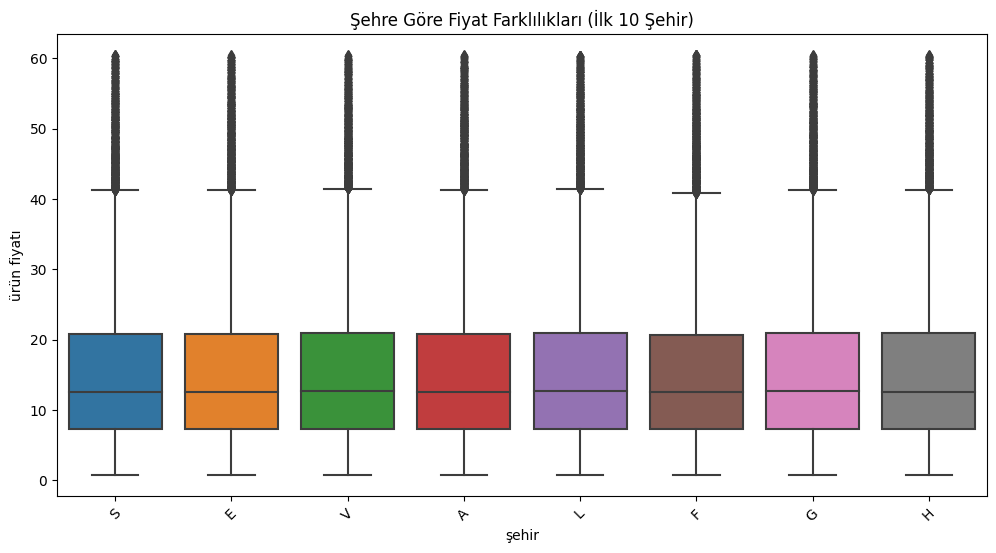

In [9]:
top_cities = train_clean['şehir'].value_counts().head(10).index
train_clean_top_cities = train_clean[train_clean['şehir'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.boxplot(x='şehir', y='ürün fiyatı', data=train_clean_top_cities)
plt.title('Şehre Göre Fiyat Farklılıkları (İlk 10 Şehir)')
plt.xticks(rotation=45)
plt.show()


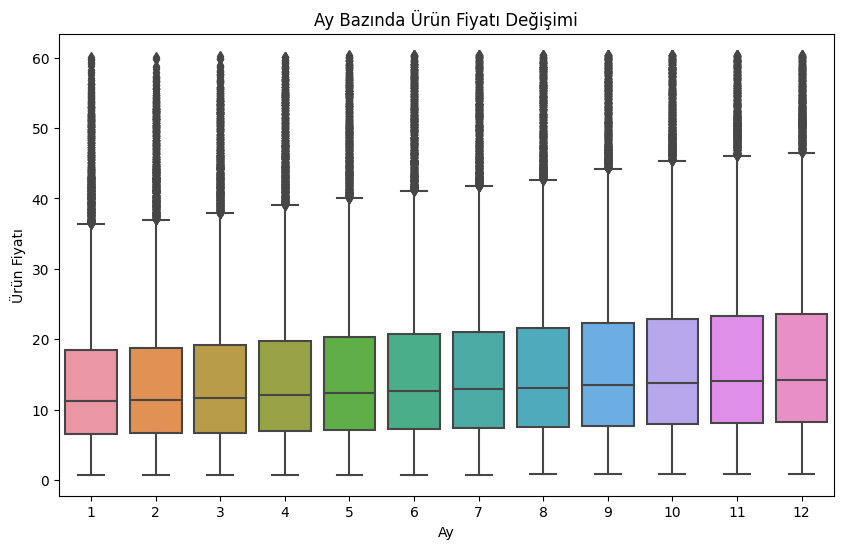

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='ürün fiyatı', data=train_clean)
plt.title('Ay Bazında Ürün Fiyatı Değişimi')
plt.xlabel('Ay')
plt.ylabel('Ürün Fiyatı')
plt.show()


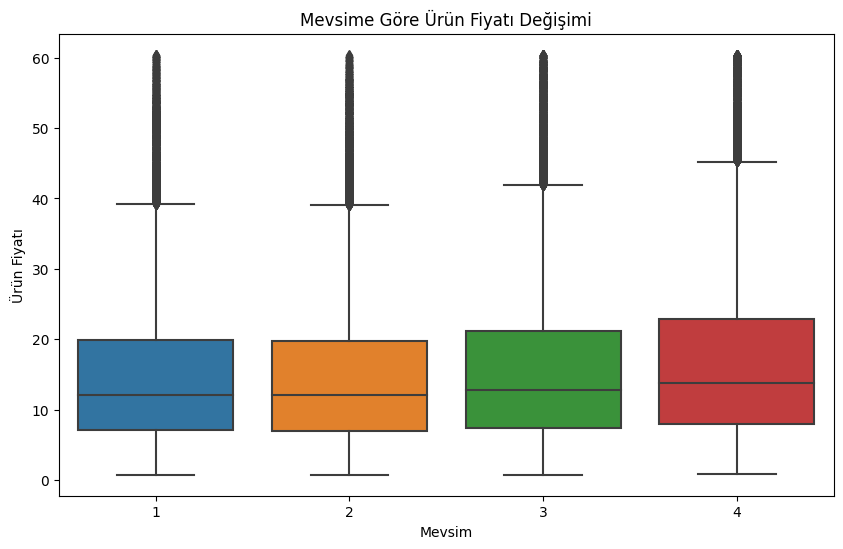

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='ürün fiyatı', data=train_clean)
plt.title('Mevsime Göre Ürün Fiyatı Değişimi')
plt.xlabel('Mevsim')
plt.ylabel('Ürün Fiyatı')
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


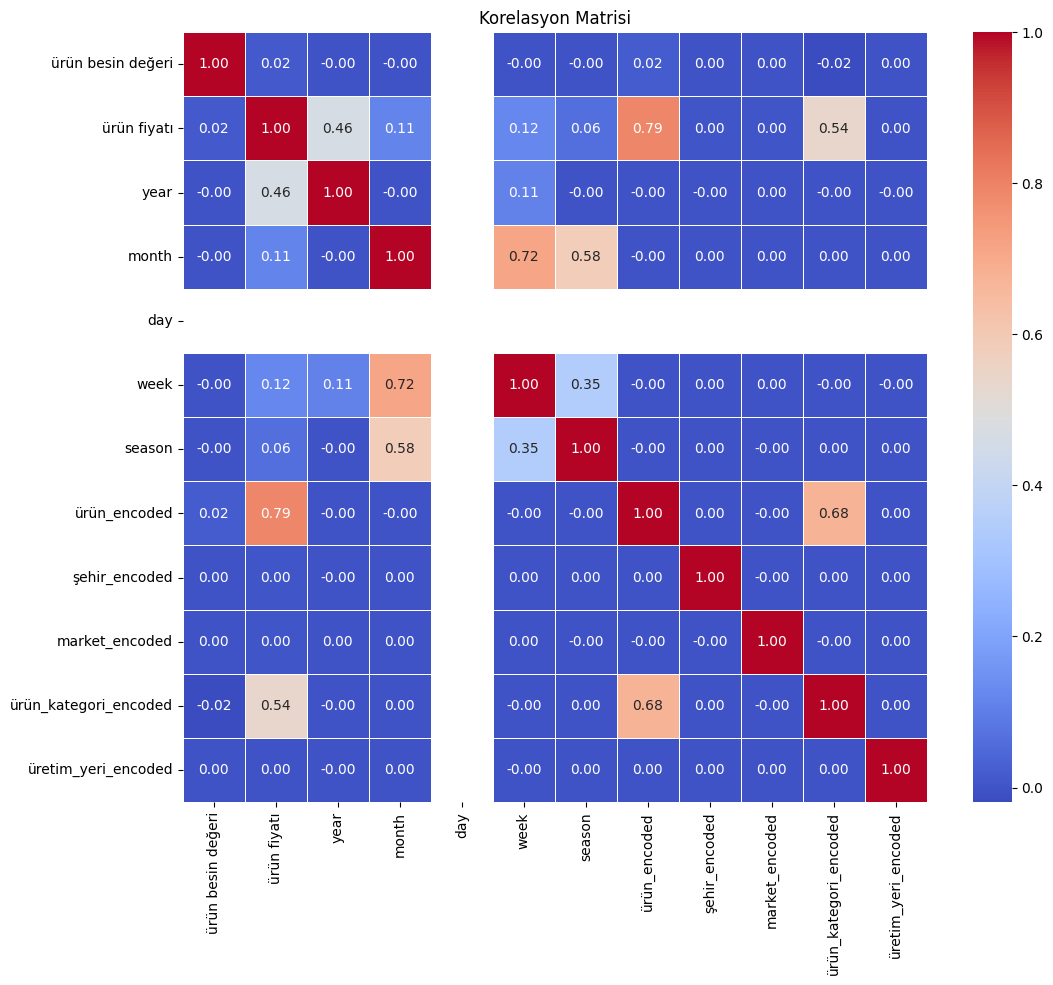

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Encode işlemleri (varsa yeniden üretilebilir)
train['ürün_encoded'] = train.groupby('ürün')['ürün fiyatı'].transform('mean')
train['şehir_encoded'] = train.groupby('şehir')['ürün fiyatı'].transform('mean')
train['market_encoded'] = train.groupby('market')['ürün fiyatı'].transform('mean')
train['ürün_kategori_encoded'] = train.groupby('ürün kategorisi')['ürün fiyatı'].transform('mean')
train['üretim_yeri_encoded'] = train.groupby('ürün üretim yeri')['ürün fiyatı'].transform('mean')

# Sayısal sütunlar (hazır olanlara göre güncel)
numerical_columns = [
    'ürün besin değeri', 'ürün fiyatı',
    'year', 'month', 'day', 'week', 'season',
    'ürün_encoded', 'şehir_encoded', 'market_encoded',
    'ürün_kategori_encoded', 'üretim_yeri_encoded'
]

# Korelasyon matrisi oluştur ve görselleştir
correlation_matrix = train[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()



In [13]:
categorical_columns = ["ürün", "ürün kategorisi", "market", "şehir", "ürün üretim yeri"]

train_clean = pd.get_dummies(train_clean, columns=categorical_columns, drop_first=True)
test = pd.get_dummies(test, columns=categorical_columns, drop_first=True)

# Train ve Test aynı kolona sahip olmalı
train_clean, test = train_clean.align(test, join='left', axis=1, fill_value=0)


In [14]:
print("\nEksik değerler (train) son hali:\n", train_clean.isnull().sum())
print("\nEksik değerler (test) son hali:\n", test.isnull().sum())

print("\nTrain veri seti istatistiksel özeti:\n", train_clean.describe())
print("\nTest veri seti istatistiksel özeti:\n", test.describe())



Eksik değerler (train) son hali:
 ürün besin değeri            0
ürün fiyatı                  0
year                         0
month                        0
day                          0
                            ..
şehir_H                      0
şehir_L                      0
şehir_S                      0
şehir_V                      0
ürün üretim yeri_Yurt içi    0
Length: 100, dtype: int64

Eksik değerler (test) son hali:
 ürün besin değeri            0
ürün fiyatı                  0
year                         0
month                        0
day                          0
                            ..
şehir_H                      0
şehir_L                      0
şehir_S                      0
şehir_V                      0
ürün üretim yeri_Yurt içi    0
Length: 100, dtype: int64

Train veri seti istatistiksel özeti:
        ürün besin değeri    ürün fiyatı           year          month  \
count      223407.000000  223407.000000  223407.000000  223407.000000   
mean        

In [15]:
print("\nTrain veri seti türleri:\n", train_clean.dtypes)



Train veri seti türleri:
 ürün besin değeri              int64
ürün fiyatı                  float64
year                           int32
month                          int32
day                            int32
                              ...   
şehir_H                         bool
şehir_L                         bool
şehir_S                         bool
şehir_V                         bool
ürün üretim yeri_Yurt içi       bool
Length: 100, dtype: object


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Özellikler ve hedef değişken
X = train.drop(columns=['ürün fiyatı', 'ürün', 'market', 'şehir', 'ürün kategorisi', 'ürün üretim yeri'])
y = train['ürün fiyatı']

# Eğitim ve test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahminler
y_pred = lr_model.predict(X_test)

# Değerlendirme metrikleri
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Sonuçları:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


Linear Regression Sonuçları:
RMSE: 5.40
MAE: 3.62
R²: 0.8591


In [17]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nÖzelliklerin Etkileri:")
display(coefficients)



Özelliklerin Etkileri:


,Feature,Coefficient
1,year,4.791503e+00
8,market_encoded,1.008891e+00
6,ürün_encoded,9.989383e-01
10,üretim_yeri_encoded,9.079279e-01
7,şehir_encoded,8.276499e-01
2,month,5.770901e-01
9,ürün_kategori_encoded,7.549852e-04
0,ürün besin değeri,4.056851e-05
3,day,-3.413936e-15
4,week,-2.556638e-02


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Encode edilmiş sütunları seçelim
encoded_columns = [
    'year', 'month', 'day', 'week', 'season',
    'ürün_encoded', 'şehir_encoded', 'market_encoded',
    'ürün_kategori_encoded', 'üretim_yeri_encoded',
    'ürün besin değeri'
]

X = train[encoded_columns]
y = train['ürün fiyatı']

# Train-test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest R²: {r2:.4f}")


Random Forest RMSE: 1.39
Random Forest MAE: 0.77
Random Forest R²: 0.9906


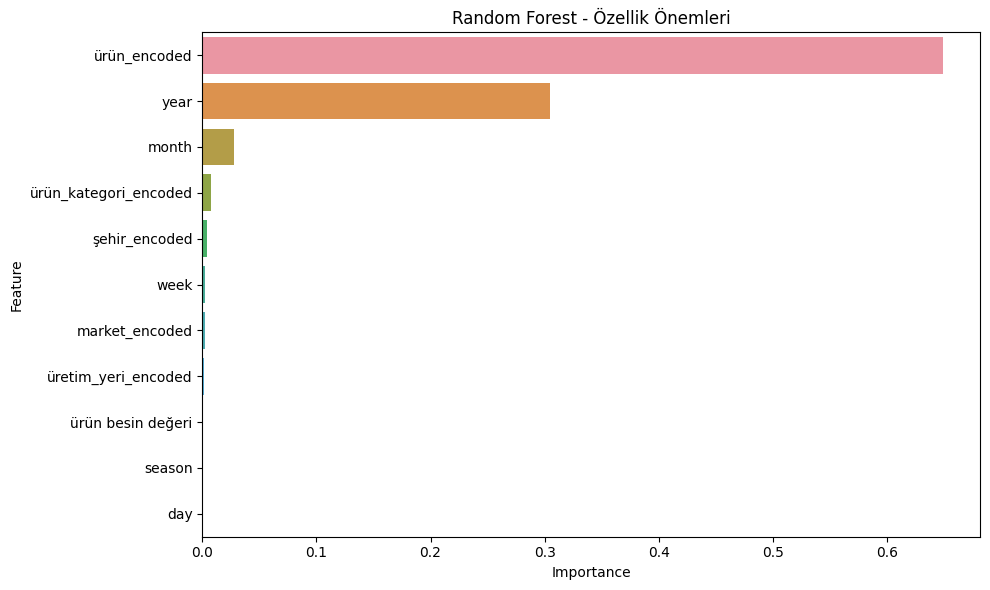

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest - Özellik Önemleri')
plt.tight_layout()
plt.show()


In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Özellikler ve hedef değişken
X = train.drop(columns=['ürün fiyatı', 'ürün', 'market', 'şehir', 'ürün kategorisi', 'ürün üretim yeri'])
y = train['ürün fiyatı']

# Eğitim ve test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Modeli
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Tahminler
y_pred_xgb = xgb_model.predict(X_test)

# Değerlendirme metrikleri
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Sonuçları:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R²: {r2_xgb:.4f}")


XGBoost Sonuçları:
RMSE: 1.10
MAE: 0.65
R²: 0.9942


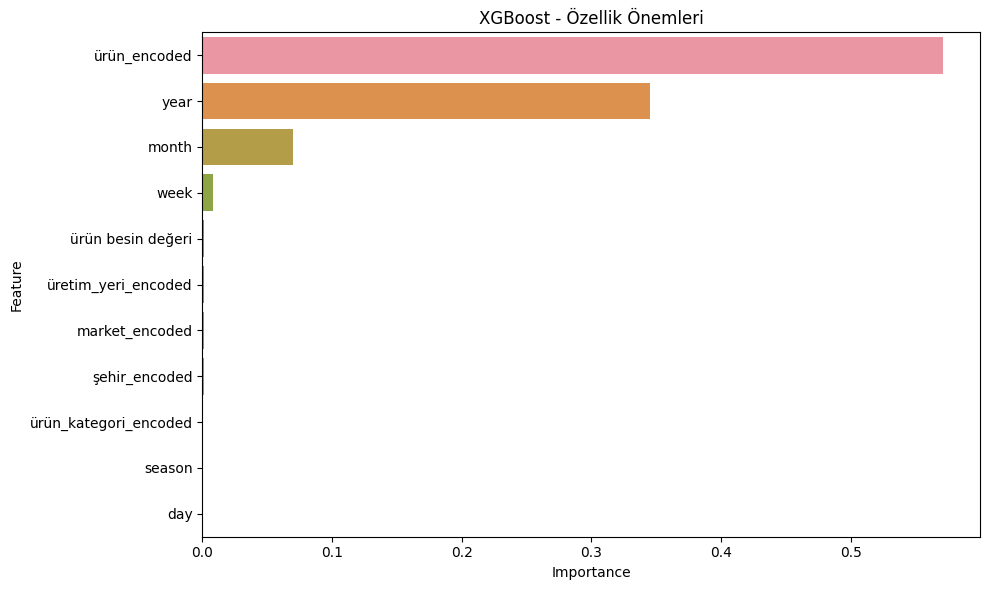

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Özelliklerin önem derecelerini al
importances = xgb_model.feature_importances_

# Özellikler
features = X.columns

# Önem sırasına göre bir DataFrame oluştur
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Özelliklerin önemlerini görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost - Özellik Önemleri')
plt.tight_layout()
plt.show()


In [22]:
xgb_model = XGBRegressor(random_state=42, n_estimators=1000)
xgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              early_stopping_rounds=50,
              verbose=True)


[0]	validation_0-rmse:10.21075
[1]	validation_0-rmse:7.31425
[2]	validation_0-rmse:5.29874
[3]	validation_0-rmse:3.89903
[4]	validation_0-rmse:2.95123
[5]	validation_0-rmse:2.32045
[6]	validation_0-rmse:1.91680
[7]	validation_0-rmse:1.67283
[8]	validation_0-rmse:1.52859
[9]	validation_0-rmse:1.44844
[10]	validation_0-rmse:1.40527


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.38032
[12]	validation_0-rmse:1.36589
[13]	validation_0-rmse:1.35091
[14]	validation_0-rmse:1.34503
[15]	validation_0-rmse:1.33966
[16]	validation_0-rmse:1.33443
[17]	validation_0-rmse:1.33156
[18]	validation_0-rmse:1.32745
[19]	validation_0-rmse:1.32329
[20]	validation_0-rmse:1.32198
[21]	validation_0-rmse:1.32119
[22]	validation_0-rmse:1.32112
[23]	validation_0-rmse:1.31937
[24]	validation_0-rmse:1.31804
[25]	validation_0-rmse:1.31689
[26]	validation_0-rmse:1.31615
[27]	validation_0-rmse:1.31574
[28]	validation_0-rmse:1.31347
[29]	validation_0-rmse:1.30597
[30]	validation_0-rmse:1.29964
[31]	validation_0-rmse:1.28967
[32]	validation_0-rmse:1.28075
[33]	validation_0-rmse:1.27247
[34]	validation_0-rmse:1.27055
[35]	validation_0-rmse:1.26394
[36]	validation_0-rmse:1.25891
[37]	validation_0-rmse:1.25240
[38]	validation_0-rmse:1.24745
[39]	validation_0-rmse:1.24119
[40]	validation_0-rmse:1.23902
[41]	validation_0-rmse:1.23441
[42]	validation_0-rmse:1.23288
[43]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
from xgboost import XGBRegressor

# Modeli karmaşıklığı azaltacak parametrelerle tanımlıyoruz
xgb_model = XGBRegressor(
    random_state=42,
    max_depth=3,           # daha sığ ağaçlar
    min_child_weight=3,    # minimum çocuk örnek sayısı
    subsample=0.8,         # her ağaçta %80 örnek kullan
    colsample_bytree=0.8   # her ağaçta %80 değişken kullan
)

# Eğitimi early stopping ile yapıyorsan eval_set kullan
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=True
)

# Tahminler
y_pred_xgb = xgb_model.predict(X_test)

# Değerlendirme metrikleri
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Sonuçları (Karmaşıklık azaltılmış):")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R²: {r2_xgb:.4f}")


[0]	validation_0-rmse:12.32361
[1]	validation_0-rmse:11.06235
[2]	validation_0-rmse:8.57032
[3]	validation_0-rmse:7.19254
[4]	validation_0-rmse:5.94315
[5]	validation_0-rmse:5.08166
[6]	validation_0-rmse:4.61537
[7]	validation_0-rmse:4.05442
[8]	validation_0-rmse:3.70644
[9]	validation_0-rmse:3.53504
[10]	validation_0-rmse:3.37808
[11]	validation_0-rmse:3.11592
[12]	validation_0-rmse:3.04772
[13]	validation_0-rmse:2.91224
[14]	validation_0-rmse:2.80823
[15]	validation_0-rmse:2.58345


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:2.44180
[17]	validation_0-rmse:2.32005
[18]	validation_0-rmse:2.29789
[19]	validation_0-rmse:2.24924
[20]	validation_0-rmse:2.22352
[21]	validation_0-rmse:2.17833
[22]	validation_0-rmse:2.15645
[23]	validation_0-rmse:2.13222
[24]	validation_0-rmse:2.11392
[25]	validation_0-rmse:2.05340
[26]	validation_0-rmse:2.03982
[27]	validation_0-rmse:1.98995
[28]	validation_0-rmse:1.97596
[29]	validation_0-rmse:1.96235
[30]	validation_0-rmse:1.94330
[31]	validation_0-rmse:1.93402
[32]	validation_0-rmse:1.92753
[33]	validation_0-rmse:1.92420
[34]	validation_0-rmse:1.88608
[35]	validation_0-rmse:1.87565
[36]	validation_0-rmse:1.86969
[37]	validation_0-rmse:1.83761
[38]	validation_0-rmse:1.82661
[39]	validation_0-rmse:1.78832
[40]	validation_0-rmse:1.78119
[41]	validation_0-rmse:1.77694
[42]	validation_0-rmse:1.72803
[43]	validation_0-rmse:1.72534
[44]	validation_0-rmse:1.72360
[45]	validation_0-rmse:1.71703
[46]	validation_0-rmse:1.71022
[47]	validation_0-rmse:1.70779
[48]	val

In [24]:
from xgboost import XGBRegressor

# Regularization eklenmiş model
xgb_model = XGBRegressor(
    random_state=42,
    max_depth=3,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,     # L1 cezası
    reg_lambda=1       # L2 cezası
)

# Eğitimi yine early stopping ile yap
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=True
)

# Tahminler
y_pred_xgb = xgb_model.predict(X_test)

# Değerlendirme metrikleri
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Sonuçları (Regularization eklenmiş):")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R²: {r2_xgb:.4f}")


[0]	validation_0-rmse:12.32361
[1]	validation_0-rmse:11.06235
[2]	validation_0-rmse:8.57032
[3]	validation_0-rmse:7.19254
[4]	validation_0-rmse:5.94315
[5]	validation_0-rmse:5.08166
[6]	validation_0-rmse:4.61538
[7]	validation_0-rmse:4.05443
[8]	validation_0-rmse:3.70645
[9]	validation_0-rmse:3.53505
[10]	validation_0-rmse:3.37809
[11]	validation_0-rmse:3.11593
[12]	validation_0-rmse:3.04773
[13]	validation_0-rmse:2.91224
[14]	validation_0-rmse:2.80824


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:2.58346
[16]	validation_0-rmse:2.44180
[17]	validation_0-rmse:2.32005
[18]	validation_0-rmse:2.29789
[19]	validation_0-rmse:2.24924
[20]	validation_0-rmse:2.22353
[21]	validation_0-rmse:2.17834
[22]	validation_0-rmse:2.15465
[23]	validation_0-rmse:2.13069
[24]	validation_0-rmse:2.11241
[25]	validation_0-rmse:2.05228
[26]	validation_0-rmse:2.03918
[27]	validation_0-rmse:1.98883
[28]	validation_0-rmse:1.97481
[29]	validation_0-rmse:1.96438
[30]	validation_0-rmse:1.89780
[31]	validation_0-rmse:1.89084
[32]	validation_0-rmse:1.87419
[33]	validation_0-rmse:1.86959
[34]	validation_0-rmse:1.81513
[35]	validation_0-rmse:1.78671
[36]	validation_0-rmse:1.77350
[37]	validation_0-rmse:1.75603
[38]	validation_0-rmse:1.75289
[39]	validation_0-rmse:1.74369
[40]	validation_0-rmse:1.73959
[41]	validation_0-rmse:1.73676
[42]	validation_0-rmse:1.72351
[43]	validation_0-rmse:1.71411
[44]	validation_0-rmse:1.71189
[45]	validation_0-rmse:1.70893
[46]	validation_0-rmse:1.70341
[47]	val

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Model
xgb_model = XGBRegressor(random_state=42)

# Parametre aralıkları
param_distributions = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=30,                   # 30 rastgele kombinasyon dene
    cv=3,                        # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,                   # tüm çekirdekleri kullan
    random_state=42
)

# Fit
random_search.fit(X_train, y_train)

# En iyi parametreler ve skor
print("En iyi parametreler:", random_search.best_params_)
print("En iyi skor:", -random_search.best_score_)

# En iyi modeli test setinde değerlendir
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Değerlendirme metrikleri
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Sonuçları (RandomizedSearch sonrası):")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R²: {r2_xgb:.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'min_child_weight': 3, 'max_depth': 6, 'colsample_bytree': 0.9}
En iyi skor: 1.406846795912286
XGBoost Sonuçları (RandomizedSearch sonrası):
RMSE: 1.16
MAE: 0.68
R²: 0.9935


In [29]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğitimi
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Feature importance al
importances = xgb_model.feature_importances_
features = ['ürün besin değeri', 'year', 'month', 'day', 'week', 'season', 
            'ürün_encoded', 'şehir_encoded', 'market_encoded', 
            'ürün_kategori_encoded', 'üretim_yeri_encoded']

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Özellik önem sıralaması:")
print(importance_df)

# Önem eşiği belirle (örnek: %1'den küçükleri at)
threshold = 0.01
important_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()

# Yeni X matrisi oluştur (önemsizler çıkarıldı)
X_reduced = X[important_features]
print(f"\nÖnemsiz değişkenler çıkarıldı. Kalan değişkenler: {important_features}")


Özellik önem sıralaması:
                  Feature  Importance
6            ürün_encoded    0.571149
1                    year    0.345543
2                   month    0.070160
4                    week    0.008197
0       ürün besin değeri    0.001090
10    üretim_yeri_encoded    0.001018
8          market_encoded    0.001011
7           şehir_encoded    0.000961
9   ürün_kategori_encoded    0.000702
5                  season    0.000170
3                     day    0.000000

Önemsiz değişkenler çıkarıldı. Kalan değişkenler: ['ürün_encoded', 'year', 'month']


In [31]:
# Örnek: hafta sonu mu? (cumartesi = 6, pazar = 7)
X_reduced.loc[:, 'hafta_sonu'] = X['day'].apply(lambda x: 1 if x in [6, 7] else 0)

# Örnek: tatil sezonu mu? (aralık = 12, ocak = 1)
X_reduced.loc[:, 'tatil_sezonu'] = X['month'].apply(lambda x: 1 if x in [12, 1] else 0)

# One-hot encoding uygulanacak kategorik değişkenler (önce X'ten çekiyoruz çünkü X_reduced'ta bunlar artık yok)
categorical_columns = ['şehir_encoded', 'market_encoded', 'ürün_kategori_encoded', 'üretim_yeri_encoded']
X_categorical = X[categorical_columns]

# One-hot encoding (drop_first=True → dummy variable trap önler)
X_categorical_encoded = pd.get_dummies(X_categorical, columns=categorical_columns, drop_first=True)

# Final birleşim → X_reduced + one-hot encoded kategorikler
X_final = pd.concat([X_reduced.reset_index(drop=True), X_categorical_encoded.reset_index(drop=True)], axis=1)

print("Yeni özellikler ve one-hot encoding tamamlandı.")
print("Final sütunlar:", list(X_final.columns))


Yeni özellikler ve one-hot encoding tamamlandı.
Final sütunlar: ['ürün_encoded', 'year', 'month', 'hafta_sonu', 'tatil_sezonu', 'şehir_encoded_16.989788326300985', 'şehir_encoded_17.002563291139243', 'şehir_encoded_17.009176511954994', 'şehir_encoded_17.043999296765122', 'şehir_encoded_17.044352320675106', 'şehir_encoded_17.047288326300986', 'şehir_encoded_17.052943389592123', 'market_encoded_17.03263897679325', 'market_encoded_17.04159084915612', 'ürün_kategori_encoded_10.420984760802469', 'ürün_kategori_encoded_15.534467552681992', 'ürün_kategori_encoded_26.588236111111108', 'ürün_kategori_encoded_31.349665972222223', 'ürün_kategori_encoded_36.961375000000004', 'üretim_yeri_encoded_17.02356144514768']


In [32]:
from sklearn.feature_selection import RFE

# XGBoost modelini tanımla
xgb_model = XGBRegressor(random_state=42)

# RFE ile özellik seçimi (örneğin: en iyi 10 özellik)
rfe = RFE(estimator=xgb_model, n_features_to_select=10)
rfe.fit(X_final, y)

# Seçilen özellikler
selected_features = X_final.columns[rfe.support_].tolist()

print("Seçilen en iyi özellikler (RFE):")
print(selected_features)

# Yeni X_final oluştur → sadece seçilen değişkenler
X_selected = X_final[selected_features]


Seçilen en iyi özellikler (RFE):
['ürün_encoded', 'year', 'month', 'şehir_encoded_17.009176511954994', 'şehir_encoded_17.043999296765122', 'şehir_encoded_17.052943389592123', 'market_encoded_17.03263897679325', 'ürün_kategori_encoded_26.588236111111108', 'ürün_kategori_encoded_31.349665972222223', 'üretim_yeri_encoded_17.02356144514768']


In [40]:
# RFE sonuçlarından gelen kolon listesi
RFE_columns = [
    'ürün_encoded', 'year', 'month',
    'şehir_encoded_17.009176511954994',
    'şehir_encoded_17.043999296765122',
    'şehir_encoded_17.052943389592123',
    'market_encoded_17.03263897679325',
    'ürün_kategori_encoded_26.588236111111108',
    'ürün_kategori_encoded_31.349665972222223',
    'üretim_yeri_encoded_17.02356144514768'
]

# RFE_columns içindeki isimleri içeren X sütunlarını bul
final_columns = []
for col in RFE_columns:
    matched_cols = [c for c in X.columns if col in c]
    final_columns.extend(matched_cols)

# Eşleşen kolonlarla yeni X matrisi oluştur
X_selected = X[final_columns]

# Train-test böl
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Modeli yeniden eğit
xgb_model.fit(X_train, y_train)

# Tahminler
y_pred = xgb_model.predict(X_test)

# Değerlendirme
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final Model Sonuçları:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


Final Model Sonuçları:
RMSE: 1.35
MAE: 0.76
R²: 0.9912


In [41]:
# Erken durdurma ve regularization ile XGBoost
xgb_model_final = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

# Erken durdurma için fit
xgb_model_final.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    early_stopping_rounds=20,
    verbose=True
)

# Tahminler
y_pred_final = xgb_model_final.predict(X_test)

# Değerlendirme
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final İyileştirilmiş Model Sonuçları:")
print(f"RMSE: {rmse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"R²: {r2_final:.4f}")


[0]	validation_0-rmse:13.93541
[1]	validation_0-rmse:13.51078
[2]	validation_0-rmse:13.32147
[3]	validation_0-rmse:12.91923
[4]	validation_0-rmse:12.54471
[5]	validation_0-rmse:12.36337
[6]	validation_0-rmse:12.19659
[7]	validation_0-rmse:11.61171
[8]	validation_0-rmse:11.27460
[9]	validation_0-rmse:11.12461
[10]	validation_0-rmse:10.98815
[11]	validation_0-rmse:10.86375


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:10.34395
[13]	validation_0-rmse:10.23562
[14]	validation_0-rmse:9.92320
[15]	validation_0-rmse:9.82041
[16]	validation_0-rmse:9.35318
[17]	validation_0-rmse:9.26463
[18]	validation_0-rmse:8.98379
[19]	validation_0-rmse:8.55899
[20]	validation_0-rmse:8.31005
[21]	validation_0-rmse:7.92061
[22]	validation_0-rmse:7.84313
[23]	validation_0-rmse:7.77229
[24]	validation_0-rmse:7.54941
[25]	validation_0-rmse:7.48288
[26]	validation_0-rmse:7.27416
[27]	validation_0-rmse:6.93710
[28]	validation_0-rmse:6.75301
[29]	validation_0-rmse:6.44272
[30]	validation_0-rmse:6.14923
[31]	validation_0-rmse:5.87183
[32]	validation_0-rmse:5.81906
[33]	validation_0-rmse:5.55976
[34]	validation_0-rmse:5.51379
[35]	validation_0-rmse:5.27023
[36]	validation_0-rmse:5.13731
[37]	validation_0-rmse:4.91357
[38]	validation_0-rmse:4.87409
[39]	validation_0-rmse:4.66540
[40]	validation_0-rmse:4.46841
[41]	validation_0-rmse:4.28237
[42]	validation_0-rmse:4.10815
[43]	validation_0-rmse:3.94448
[44]	v